In [126]:
# Import necessary libraries
from dataframe_utils import * # this imports all the functions from our dataframe_utils including all the imports
from plotting_utils import * # this imports all the functions from our plotting_utils
from scipy import stats
from matplotlib.patches import Rectangle
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
# If looking at day_time:
runs = {'202003': [1,2,3,4,5,6,7,8,9,10],
        '202007': [1,2,3,4,5,6],
        '202008': [1,2,3,4,5,6,7,8,9,10,11],
        '202010': [1,2,3,4],
        '202106': [1,2,3,4,5,6,7,8,9,10,11],
        '202107': [1,2,3,4],
        '202108': [1,2,3,4,5,6],
        '202203': [1,2,3,4,5,6],
       '202212': [1,2,3,4,5,6,7,8,9,10,11],
       '202210': [3,4,5,6,7,8,9,10,11],
       '202211': [1,2,3,4],
       '202303': [4,5,6],
       '202403': [1,2,3,4,5,6,7,8,9,10,11],
       '202404': [1,2,3,4,5,6],
       '202406': [1,2,3,4,5,6],
       '202407': [1,2,3,4,5,6]}

        
min_dpf = 0
max_dpf = 11

In [ ]:
# If looking at night_time:
runs = {'202106': [1,2,3,4,5,6,7,8,9,10,11],
        '202107': [1,2,3,4],
        '202108': [1,2,3,4,5,6],
        '202203': [1,2,3,4,5,6],
        '202210': [3,4,5,6,7,8,9,10,11],
        '202211': [1,2,3,4],
        '202303': [4,5,6],
        '202403': [1,2,3,4,5,6,7,8,9,10,11],
       '202404': [1,2,3,4,5,6],
       '202406': [1,2,3,4,5,6],
       '202407': [1,2,3,4,5,6]}

        
min_dpf = 0
max_dpf = 11

In [128]:
dfs  = {}
for run in runs.keys():
    df = pd.read_csv(f'../{run}/data/{run}_mom_visitation.csv')    
    dfs[run] = df

In [129]:
# NB: switch between day and night accordingly
new_dfs = {}

for run, df in dfs.items():
    df_day = df[df['day_night'] == 'day']
    df_day = df_day.rename({'class': run}, axis=1)
    df_day = df_day.drop(labels="day_night", axis=1)
    df_day = df_day.set_index('dpf')
    new_dfs[run] = df_day


In [130]:
one_df = pd.concat(new_dfs.values(),axis=1, ignore_index=False)
one_df.head(35)

,202003,202007,202008,202010,202106,202107,202108,202203,202212,202210,202211,202303,202403,202404,202406,202407
dpf,,,,,,,,,,,,,,,,
0,2,15.0,5,24.0,34,44.0,27.0,24.0,83,NaN,47.0,NaN,36,40.0,13.0,22.0
1,9,13.0,10,33.0,22,24.0,26.0,23.0,25,NaN,35.0,NaN,25,20.0,14.0,12.0
2,25,68.0,22,52.0,36,44.0,62.0,40.0,34,39.0,88.0,NaN,40,29.0,30.0,21.0
3,10,58.0,19,27.0,29,36.0,61.0,28.0,24,37.0,57.0,20.0,22,18.0,17.0,14.0
4,3,5.0,7,8.0,9,20.0,49.0,19.0,17,23.0,17.0,17.0,6,15.0,7.0,11.0
5,3,4.0,3,6.0,21,3.0,44.0,15.0,15,20.0,3.0,31.0,13,11.0,6.0,7.0
6,5,6.0,7,NaN,17,NaN,46.0,18.0,17,16.0,NaN,20.0,13,12.0,10.0,9.0
7,3,13.0,7,NaN,17,19.0,7.0,34.0,15,18.0,NaN,8.0,5,1.0,NaN,1.0
8,5,NaN,4,NaN,13,NaN,NaN,NaN,11,24.0,NaN,NaN,2,NaN,NaN,NaN


In [131]:
one_df_T = one_df.transpose()
one_df_T

dpf,0,1,2,3,4,5,6,7,8,9,10,11
202003,2.0,9.0,25.0,10.0,3.0,3.0,5.0,3.0,5.0,4.0,23.0,2.0
202007,15.0,13.0,68.0,58.0,5.0,4.0,6.0,13.0,NaN,NaN,NaN,NaN
202008,5.0,10.0,22.0,19.0,7.0,3.0,7.0,7.0,4.0,11.0,1.0,1.0
202010,24.0,33.0,52.0,27.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,2.0
202106,34.0,22.0,36.0,29.0,9.0,21.0,17.0,17.0,13.0,7.0,4.0,3.0
202107,44.0,24.0,44.0,36.0,20.0,3.0,NaN,19.0,NaN,NaN,NaN,NaN
202108,27.0,26.0,62.0,61.0,49.0,44.0,46.0,7.0,NaN,NaN,NaN,1.0
202203,24.0,23.0,40.0,28.0,19.0,15.0,18.0,34.0,NaN,NaN,NaN,NaN
202212,83.0,25.0,34.0,24.0,17.0,15.0,17.0,15.0,11.0,11.0,14.0,12.0
202210,NaN,NaN,39.0,37.0,23.0,20.0,16.0,18.0,24.0,12.0,8.0,2.0


### slice number matrix

In [132]:
slice_num_dfs  = {}
for run in runs.keys():
    df_slice_num = pd.read_csv(f'../{run}/data/{run}_slice_totals_df.csv')    
    slice_num_dfs[run] = df_slice_num

In [133]:
# NB: switch between day and night accordingly
new_slice_dfs = {}

for run, df_sl in slice_num_dfs.items():
    slice_df_day = df_sl[df_sl['day_night'] == 'day']
    slice_df_day = slice_df_day.rename({'day_night_slice': run}, axis=1)
    slice_df_day = slice_df_day.drop(labels="day_night", axis=1)
    slice_df_day = slice_df_day.set_index('dpf')
    new_slice_dfs[run] = slice_df_day

In [134]:
one_slice_df = pd.concat(new_slice_dfs.values(),axis=1, ignore_index=False)

In [135]:
one_slice_df_T = one_slice_df.transpose()
one_slice_df_T

dpf,0,1,2,3,4,5,6,7,8,9,10,11
202003,19.0,107.0,107.0,108.0,108.0,107.0,107.0,78.0,76.0,107.0,107.0,70.0
202007,70.0,108.0,107.0,107.0,108.0,102.0,107.0,108.0,107.0,107.0,106.0,3.0
202008,57.0,108.0,107.0,107.0,108.0,107.0,107.0,108.0,108.0,107.0,107.0,108.0
202010,54.0,108.0,107.0,107.0,108.0,107.0,107.0,100.0,108.0,107.0,107.0,52.0
202106,116.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0
202107,113.0,117.0,117.0,117.0,118.0,9.0,NaN,111.0,117.0,116.0,48.0,23.0
202108,100.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,119.0,117.0,117.0
202203,117.0,118.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,95.0
202212,117.0,112.0,120.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0
202210,NaN,NaN,55.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0,116.0


In [136]:
proportion_dfs = one_df_T/one_slice_df_T
proportion_dfs

dpf,0,1,2,3,4,5,6,7,8,9,10,11
202003,0.105263,0.084112,0.233645,0.092593,0.027778,0.028037,0.046729,0.038462,0.065789,0.037383,0.214953,0.028571
202007,0.214286,0.120370,0.635514,0.542056,0.046296,0.039216,0.056075,0.120370,NaN,NaN,NaN,NaN
202008,0.087719,0.092593,0.205607,0.177570,0.064815,0.028037,0.065421,0.064815,0.037037,0.102804,0.009346,0.009259
202010,0.444444,0.305556,0.485981,0.252336,0.074074,0.056075,NaN,NaN,NaN,NaN,NaN,0.038462
202106,0.293103,0.188034,0.307692,0.247863,0.076923,0.179487,0.145299,0.145299,0.111111,0.059829,0.034188,0.025641
202107,0.389381,0.205128,0.376068,0.307692,0.169492,0.333333,NaN,0.171171,NaN,NaN,NaN,NaN
202108,0.270000,0.222222,0.529915,0.521368,0.418803,0.376068,0.393162,0.059829,NaN,NaN,NaN,0.008547
202203,0.205128,0.194915,0.341880,0.239316,0.162393,0.128205,0.153846,0.290598,NaN,NaN,NaN,NaN
202212,0.709402,0.223214,0.283333,0.198347,0.140496,0.123967,0.140496,0.123967,0.090909,0.090909,0.115702,0.099174
202210,NaN,NaN,0.709091,0.318966,0.198276,0.172414,0.137931,0.155172,0.206897,0.103448,0.068966,0.017241


In [137]:
os.getcwd()

'p:\\Anaysis\\Inshell\\code'

In [139]:
proportion_dfs.to_csv(f'../summary_data/Summary_prop_visits_day.csv', index=True)

### Now go change table:
#### Delete all 0 dpf 
#### Go up to initial dictionary and ensure there are datapoints ONLY for DPFs listed, if no datapoint but dpf listed, put 0
#### Save as Summary_visitation_adapted.csv

In [146]:
df_summary = pd.read_csv(f'../summary_data/Summary_prop_visits_night_adapted.csv')

In [147]:
df_summary

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,202106,NaN,0.951807,0.975904,0.975904,0.952381,0.975904,1.000000,0.963855,0.975904,1.000000,0.976190,0.940476
1,202107,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202108,NaN,1.000000,0.987952,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
3,202203,NaN,0.915663,0.951807,0.927711,0.903614,0.915663,0.891566,NaN,NaN,NaN,NaN,NaN
4,202210,NaN,NaN,NaN,0.988235,1.000000,1.000000,0.976471,1.000000,1.000000,0.929412,0.976471,0.952941
5,202211,NaN,0.906977,0.941860,0.988372,0.906977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,202303,NaN,NaN,NaN,NaN,0.918605,0.918605,0.930233,NaN,NaN,NaN,NaN,NaN
7,202403,NaN,0.965116,0.988372,0.988372,0.976744,0.976744,0.965116,0.930233,0.046512,0.093023,0.139535,0.058140
8,202404,NaN,0.976744,0.988372,0.976744,0.988372,0.965116,0.976744,NaN,NaN,NaN,NaN,NaN
9,202406,NaN,0.686047,0.988372,0.988372,0.976744,0.965116,0.941860,NaN,NaN,NaN,NaN,NaN


In [148]:
# Filter out first column
dpfs = [str(i) for i in range(min_dpf, max_dpf+1)]
df_filtered = df_summary[dpfs]
df_filtered

,0,1,2,3,4,5,6,7,8,9,10,11
0,NaN,0.951807,0.975904,0.975904,0.952381,0.975904,1.000000,0.963855,0.975904,1.000000,0.976190,0.940476
1,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.000000,0.987952,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
3,NaN,0.915663,0.951807,0.927711,0.903614,0.915663,0.891566,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.988235,1.000000,1.000000,0.976471,1.000000,1.000000,0.929412,0.976471,0.952941
5,NaN,0.906977,0.941860,0.988372,0.906977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,0.918605,0.918605,0.930233,NaN,NaN,NaN,NaN,NaN
7,NaN,0.965116,0.988372,0.988372,0.976744,0.976744,0.965116,0.930233,0.046512,0.093023,0.139535,0.058140
8,NaN,0.976744,0.988372,0.976744,0.988372,0.965116,0.976744,NaN,NaN,NaN,NaN,NaN
9,NaN,0.686047,0.988372,0.988372,0.976744,0.965116,0.941860,NaN,NaN,NaN,NaN,NaN


In [149]:
# Calculate averages
df_avg = df_filtered.mean(axis=0)
type(df_avg)

pandas.core.series.Series

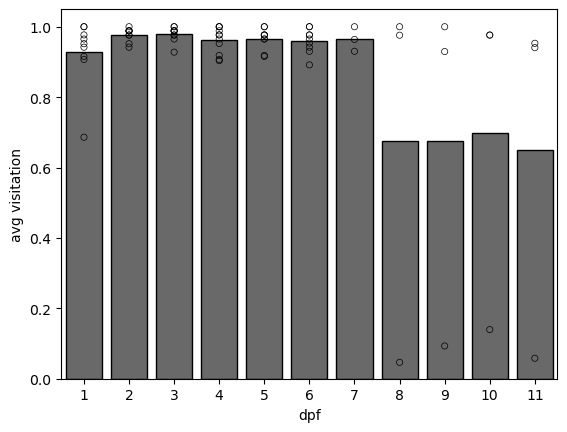

In [150]:
#day:
# Hex_colour = '#FFFFFF'
#night
Hex_colour = '#696969' 


# Create barchart
plt.bar(list(df_avg.index),df_avg, zorder=1, facecolor=Hex_colour, edgecolor='black')

# Add dots for each dpf
for data in df_summary.iterrows():
    run_name_str = str(int(data[1]['Unnamed: 0']))
    #run_color = color_dict[run_name_str]
    plt.scatter(list(df_avg.index), data[1][dpfs], marker='o', facecolors='none',linewidth=0.5, s=20, edgecolors='black', zorder=2)

plt.xlabel('dpf')
plt.ylabel('avg visitation')
plt.xticks(ticks=range(min_dpf, max_dpf+1), labels=range(min_dpf, max_dpf+1))
plt.xlim(0.5,11.5)
plt.ylim(0.0,1.05)
fig = plt.gcf()
plt.show()

In [151]:
dpfs

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']

In [152]:
# Hex_colour = '#ffc620'
# # only run this line if you restrictiong dpfs to plot
# desired_indices = ['1','3','5','7','9','11']
# df_avg = df_avg[df_avg.index.isin(desired_indices)]

# # Create barchart
# plt.bar(desired_indices,df_avg, zorder=1, facecolor='grey', edgecolor='none')

# # Add dots for each dpf
# for data in df_summary.iterrows():
#     run_name_str = str(int(data[1]['Unnamed: 0']))
#     #run_color = color_dict[run_name_str]
#     plt.scatter(desired_indices, data[1][desired_indices], marker='o', facecolors='none', s=20, edgecolors='black', zorder=2)

# plt.xlabel('dpf')
# plt.ylabel('avg visitation')
# plt.xlim(-0.5,len(desired_indices)-0.5)
# plt.ylim(0.0,1.05)
# fig = plt.gcf()
# plt.show()

In [153]:
save_path = f'../summary_plots/cumulative_night_visitations.pdf'
save_figure(fig, save_path)

Figure saved to: p:\Anaysis\Inshell\summary_plots\cumulative_night_visitations.pdf


In [ ]:
# Create barchart
plt.plot(list(df_avg.index),df_avg, marker='o', markersize=3, zorder=1, color='black', linestyle='--')

# Add dots for each dpf
for data in df_summary.iterrows():
    run_name_str = str(int(data[1]['Unnamed: 0']))
    #run_color = color_dict[run_name_str]
    plt.plot(list(df_avg.index), data[1][dpfs], marker='o', markersize=2, linestyle='-', linewidth=0.7, color='gray', zorder=2)

plt.xlabel('dpf')
plt.ylabel('avg visitation')
plt.xticks(ticks=range(min_dpf, max_dpf+1), labels=range(min_dpf, max_dpf+1))
plt.xlim(1,11)
fig = plt.gcf()
plt.show()

## T-test time

In [ ]:
# Manual paired t-test.
for i in dpfs[1:-1]:
    for j in dpfs[dpfs.index(i)+1:]:
        differences = df_filtered[i] - df_filtered[j]
        avg_diff = differences.mean()
        n_samples = differences.count()
        variance = np.sum((differences - avg_diff) ** 2) / (n_samples-1)
        t_value = avg_diff / np.sqrt(variance /n_samples)

In [ ]:
# # Paired t-value looking at non-significant
# nonsignificant_5_10 = []
# nonsignificant_10 = []
# diff_matrix = np.zeros((len(dpfs), len(dpfs)))
# for i in dpfs[1:-1]:
#     for j in dpfs[dpfs.index(i)+1:]:
#         nan_mask = np.logical_and(np.logical_not(df_filtered[i].isna()), np.logical_not(df_filtered[j].isna()))
#         test_result = stats.ttest_rel(df_filtered[i][nan_mask], df_filtered[j][nan_mask])
#         pvalue = test_result.pvalue
#         if pvalue > 0.1:
#             nonsignificant_10.append((i,j))
#         elif 0.05 <= pvalue <= 0.1:
#             nonsignificant_5_10.append((i,j))
#         # tvalue = test_result.statistic
#         avg_diff = (df_filtered[i] - df_filtered[j]).mean()
#         diff_matrix[int(i)][int(j)] = -avg_diff
#         diff_matrix[int(j)][int(i)] = avg_diff

In [ ]:
# Paired t-value marking significant on graph
significant_1_5 = []
significant_1 = []
diff_matrix = np.zeros((len(dpfs), len(dpfs)))
for i in dpfs[1:-1]:
    for j in dpfs[dpfs.index(i)+1:]:
        nan_mask = np.logical_and(np.logical_not(df_filtered[i].isna()), np.logical_not(df_filtered[j].isna()))
        test_result = stats.ttest_rel(df_filtered[i][nan_mask], df_filtered[j][nan_mask])
        pvalue = test_result.pvalue
        if pvalue < 0.01:
            significant_1.append((i,j))
        elif 0.01 <= pvalue <= 0.05:
            significant_1_5.append((i,j))
        # tvalue = test_result.statistic
        avg_diff = (df_filtered[i] - df_filtered[j]).mean()
        diff_matrix[int(i)][int(j)] = -avg_diff
        diff_matrix[int(j)][int(i)] = avg_diff

In [ ]:
limit = max(abs(diff_matrix.min()), abs(diff_matrix.max()))
plt.imshow(diff_matrix[1:,1:], aspect='auto', cmap='bwr', interpolation='nearest', vmin=-limit, vmax=limit)
cbar = plt.colorbar()
cbar.ax.set_ylabel('average change in visitation')

for i,j in significant_1_5:
    pattern = ''
    plt.gca().add_patch(Rectangle((int(i)-1-.5, int(j)-1-.5), 1, 1, hatch=pattern, fill=False, edgecolor="black", linewidth=0.0))
    plt.gca().add_patch(Rectangle((int(j)-1-.5, int(i)-1-.5), 1, 1, hatch=pattern, fill=False, edgecolor="black", linewidth=0.0))
    
for i,j in significant_1:
    pattern = ''
    plt.gca().add_patch(Rectangle((int(i)-1-.5, int(j)-1-.5), 1, 1, hatch=pattern, fill=False, edgecolor="black", linewidth=0.0))
    plt.gca().add_patch(Rectangle((int(j)-1-.5, int(i)-1-.5), 1, 1, hatch=pattern, fill=False, edgecolor="black", linewidth=0.0))

plt.xlabel('To: DPF')
plt.ylabel('From: DPF')
plt.xticks(range(11), dpfs[1:])
plt.yticks(range(11), dpfs[1:])
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top') 
fig = plt.gcf()
plt.show()

In [ ]:
save_path = f'../summary_plots/difference_matrix.pdf'
save_figure(fig, save_path)

In [ ]:
day2day = [[diff_matrix[1+i,2+i] for i in range(10)]]
plt.imshow(day2day, cmap='bwr', interpolation='nearest', vmin=-limit, vmax=limit)
# plt.axis('off')
plt.xticks([])
plt.yticks([])
fig = plt.gcf()
plt.show()

In [ ]:
save_path = f'../summary_plots/daytoday_difference_matrix.pdf'
save_figure(fig, save_path)